# Setup

Imports

In [ ]:
!pip install "dask[dataframe]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip uninstall gensim -y
!pip install scipy==1.14.0

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
!pip install tsfresh

  Using cached tsfresh-0.20.3-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached stumpy-1.13.0-py3-none-any.whl.metadata (28 kB)
Using cached tsfresh-0.20.3-py2.py3-none-any.whl (95 kB)
Using cached stumpy-1.13.0-py3-none-any.whl (176 kB)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
from tsfresh.feature_extraction import feature_calculators

Folder Access

In [ ]:
import os

# Path Rafael
path = '/content/drive/MyDrive/pads'
os.chdir(path)

print(f'Current working directory: {os.getcwd()}')

Current working directory: /content/drive/MyDrive/pads


# Database

In [ ]:
strat = pd.read_csv('preprocessed/file_list.csv')
HC_PD = strat[strat['label'] != 2]
DD_PD = strat[strat['label'] != 0]

def getFeatures(subjects):
    features = list()
    for id in subjects:
        subject_features = list()
        try:
            x = np.fromfile(f"./preprocessed/movement/{id:03d}_ml.bin", dtype=np.float32).reshape((-1, 976))
        except FileNotFoundError:
            print(f"File for subject {id} not found.")
            continue

        for col in x:
            subject_features.append(feature_calculators.abs_energy(col))
            subject_features.append(feature_calculators.absolute_maximum(col))
            subject_features.append(feature_calculators.absolute_sum_of_changes(col))
            subject_features.append(feature_calculators.count_above_mean(col))
            subject_features.append(feature_calculators.count_below_mean(col))
            subject_features.append(feature_calculators.kurtosis(col))
            subject_features.append(feature_calculators.length(col))
            subject_features.append(feature_calculators.maximum(col))
            subject_features.append(feature_calculators.mean(col))
            subject_features.append(feature_calculators.mean_abs_change(col))
            subject_features.append(feature_calculators.mean_change(col))
            subject_features.append(feature_calculators.median(col))
            subject_features.append(feature_calculators.minimum(col))
            subject_features.append(feature_calculators.root_mean_square(col))
            subject_features.append(feature_calculators.skewness(col))
            subject_features.append(feature_calculators.standard_deviation(col))
            subject_features.append(feature_calculators.sum_values(col))
            subject_features.append(feature_calculators.variance(col))


        features.append(subject_features)
    return features

In [ ]:
X = getFeatures(strat['id'].tolist())
y = strat['label'].tolist()

df = pd.DataFrame(X)
df['label'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,label
0,0.007123,0.012745,1.155136,521,455,3.063643,976,0.009177,-0.000243,0.001185,...,0.007936,-0.000006,-0.002852,-0.111188,0.044873,1.051891,0.044868,0.639422,0.002013,0
1,0.072681,0.043526,3.240280,491,485,3.186276,976,0.029810,0.000309,0.003323,...,0.013278,0.000052,-0.007683,-0.223090,0.089579,0.329072,0.089392,5.642286,0.007991,2
2,0.005038,0.008970,1.166132,458,518,0.944489,976,0.008429,0.000359,0.001196,...,0.014244,-0.000175,-0.011340,-0.238685,0.091868,0.082525,0.091858,-1.274986,0.008438,0
3,0.004691,0.010024,1.433972,473,503,0.855791,976,0.009155,0.000116,0.001471,...,0.010063,0.000221,-0.001747,-0.205067,0.077410,-0.117358,0.077403,-1.027664,0.005991,1
4,0.104001,0.037207,2.707338,506,470,0.582028,976,0.032632,-0.000084,0.002777,...,0.105722,0.000082,0.007929,-1.083072,0.429940,-0.177099,0.429834,-9.331106,0.184757,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.009722,0.012073,1.253496,488,488,0.975729,976,0.011974,-0.000175,0.001286,...,0.013312,-0.000244,0.011270,-0.275352,0.082603,-0.388879,0.082596,1.031546,0.006822,1
465,0.004124,0.012042,0.924305,481,495,3.835111,976,0.007660,-0.000016,0.000948,...,0.016162,-0.000075,0.003772,-0.310919,0.150607,0.018938,0.150602,1.208004,0.022681,0
466,0.244611,0.046332,6.347075,478,498,-0.479680,976,0.046332,0.000169,0.006510,...,0.051454,-0.000456,0.001986,-0.626347,0.158242,-0.438780,0.158241,-0.166618,0.025040,1
467,0.012028,0.012819,2.181425,481,495,0.225030,976,0.012819,0.000191,0.002237,...,0.022413,-0.000233,0.026203,-0.447757,0.138961,-0.408488,0.138860,5.159852,0.019282,1


In [ ]:
df.to_csv('newDB.csv')

In [ ]:
df2 = pd.read_csv('database.csv')

Readymade DB

In [ ]:
df = pd.read_csv('statFeatures.csv')
df = df.drop(columns=['Unnamed: 0'])

'''
HC_PD = df[df['label'] != 2]
DD_PD = df[df['label'] != 0]
'''

"\nHC_PD = df[df['label'] != 2]\nDD_PD = df[df['label'] != 0]\n"

Naming Features

In [ ]:
tasks = ["Relaxed1", "Relaxed2", "RelaxedTask1", "RelaxedTask2", "StretchHold", "HoldWeight",
         "DrinkGlas", "CrossArms", "TouchNose", "Entrainment1", "Entrainment2"]

wrists = ["Left", "Right"]

sensors = ["Accelerometer", "Gyroscope"]

axes = ["X", "Y", "Z"]

features = ["abs_energy", "absolute_maximum", "absolute_sum_of_changes", "count_above_mean",
            "count_below_mean", "kurtosis", "length", "maximum", "mean",
            "mean_abs_change", "mean_change", "median", "minimum", "root_mean_square",
            "skewness", "standard_deviation", "sum_values", "variance"]

In [ ]:
column_names = []
for task in tasks:
    for wrist in wrists:
        for sensor in sensors:
            for axis in axes:
                for feature in features:
                    column_names.append(f"{task}_{wrist}_{sensor}_{axis}_{feature}")

column_names.append("label")
df.columns = column_names
df

,Relaxed1_Left_Accelerometer_X_abs_energy,Relaxed1_Left_Accelerometer_X_absolute_maximum,Relaxed1_Left_Accelerometer_X_absolute_sum_of_changes,Relaxed1_Left_Accelerometer_X_count_above_mean,Relaxed1_Left_Accelerometer_X_count_below_mean,Relaxed1_Left_Accelerometer_X_kurtosis,Relaxed1_Left_Accelerometer_X_length,Relaxed1_Left_Accelerometer_X_maximum,Relaxed1_Left_Accelerometer_X_mean,Relaxed1_Left_Accelerometer_X_mean_abs_change,...,Entrainment2_Right_Gyroscope_Z_mean_abs_change,Entrainment2_Right_Gyroscope_Z_mean_change,Entrainment2_Right_Gyroscope_Z_median,Entrainment2_Right_Gyroscope_Z_minimum,Entrainment2_Right_Gyroscope_Z_root_mean_square,Entrainment2_Right_Gyroscope_Z_skewness,Entrainment2_Right_Gyroscope_Z_standard_deviation,Entrainment2_Right_Gyroscope_Z_sum_values,Entrainment2_Right_Gyroscope_Z_variance,label
0,0.005346,0.009385,1.063007,500,476,0.686966,976,0.007030,-0.000233,0.001090,...,0.011756,-0.000054,-0.004338,-0.171969,0.056804,0.030953,0.056509,-5.643614,0.003193,0
1,13.380221,0.556001,28.544725,487,489,3.655442,976,0.556001,-0.000005,0.029277,...,0.012463,-0.000020,-0.014459,-0.397742,0.112564,0.010076,0.112119,-9.756145,0.012571,2
2,0.003560,0.008610,1.135437,531,445,0.573104,976,0.004668,-0.000100,0.001165,...,0.017372,-0.000042,0.003519,-0.277881,0.085805,-0.043397,0.085727,3.557633,0.007349,0
3,0.005594,0.008917,1.366292,490,486,0.843515,976,0.008917,-0.000217,0.001401,...,0.010305,-0.000164,0.001337,-0.127640,0.051773,0.026157,0.051762,1.057014,0.002679,0
4,0.019405,0.015874,2.542418,472,504,0.321554,976,0.015874,0.000018,0.002608,...,0.009476,-0.000107,0.002329,-0.150653,0.060765,0.042647,0.060694,2.872063,0.003684,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.013193,0.012904,1.575305,481,495,0.131550,976,0.011063,0.000090,0.001616,...,0.080380,-0.000780,-0.009489,-1.123851,0.426334,0.257998,0.426311,-4.365879,0.181741,1
230,0.029831,0.020558,2.028810,490,486,-0.115299,976,0.020558,0.000038,0.002081,...,0.031484,-0.000022,-0.004945,-0.352693,0.112591,-0.168042,0.111965,-11.572714,0.012536,2
231,0.013714,0.019414,1.206776,478,498,2.624293,976,0.019414,0.000154,0.001238,...,0.048100,0.000511,-0.014655,-0.731003,0.314677,0.217025,0.314488,-10.658627,0.098902,2
232,0.013222,0.015302,1.624582,509,467,1.505466,976,0.015302,-0.000036,0.001666,...,0.013198,0.000031,-0.014160,-0.212136,0.101939,0.800520,0.101938,-0.405702,0.010391,0


# Experimentos Manual + RFE

## Definições

In [ ]:
def filter_dataframe(df, wrists, tasks, sensors, axes, features):
    valid_columns = set(
        f"{task}_{wrist}_{sensor}_{axis}_{feature}"
        for task in tasks
        for wrist in wrists
        for sensor in sensors
        for axis in axes
        for feature in features
    )

    valid_columns.add('label')

    filtered_columns = [col for col in df.columns if col in valid_columns]
    filtered_df = df[filtered_columns]

    filtered_df = filtered_df[filtered_df['label'] != 2]

    return filtered_df

In [ ]:
def evaluate_classifiers_with_rfecv(X, y, classifiers, kf):
    results = {}
    selected_features_per_fold = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(f"\n--- Fold {fold + 1} ---")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        inner_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        selector = RFECV(estimator=SVC(kernel='linear'), step=1, cv=inner_kf.split(X_train_scaled, y_train), scoring='accuracy')
        selector.fit(X_train_scaled, y_train)
        X_train_selected = selector.transform(X_train_scaled)
        X_test_selected = selector.transform(X_test_scaled)

        # Save the selected features for this fold
        selected_features = selector.support_
        selected_features_per_fold.append(selected_features)

        for name, clf in classifiers.items():
            if name not in results:
                results[name] = {
                    "acc_list": [],
                    "bal_acc_list": [],
                    "f1_list": [],
                    "confusion_matrices": []
                }

            clf.fit(X_train_selected, y_train)
            y_pred = clf.predict(X_test_selected)

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

            results[name]["acc_list"].append(acc)
            results[name]["bal_acc_list"].append(bal_acc)
            results[name]["f1_list"].append(f1)
            results[name]["confusion_matrices"].append(cm)

    for name in results:
        acc_list = results[name]["acc_list"]
        bal_acc_list = results[name]["bal_acc_list"]
        f1_list = results[name]["f1_list"]
        confusion_matrices = results[name]["confusion_matrices"]

        mean_acc = np.mean(acc_list)
        std_acc = np.std(acc_list)
        mean_bal_acc = np.mean(bal_acc_list)
        std_bal_acc = np.std(bal_acc_list)
        mean_f1 = np.mean(f1_list)
        std_f1 = np.std(f1_list)
        confusion_matrix_all = np.sum(confusion_matrices, axis=0)

        results[name]["metrics"] = (mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1)
        results[name]["confusion_matrix"] = confusion_matrix_all

    return results, selected_features_per_fold

In [ ]:
def evaluate_classifiers_with_rfecv_PCA(X, y, classifiers, kf):
    results = {}
    selected_features_per_fold = []
    pca_components_per_fold = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(f"\n--- Fold {fold + 1} ---")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        inner_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        selector = RFECV(estimator=SVC(kernel='linear'), step=1, cv=inner_kf.split(X_train_scaled, y_train), scoring='accuracy')
        selector.fit(X_train_scaled, y_train)
        X_train_selected = selector.transform(X_train_scaled)
        X_test_selected = selector.transform(X_test_scaled)

        selected_features = selector.support_
        selected_features_per_fold.append(selected_features)

        pca = PCA(0.95)
        X_train_pca = pca.fit_transform(X_train_selected)
        X_test_pca = pca.transform(X_test_selected)

        pca_components_per_fold.append(pca.n_components_)

        for name, clf in classifiers.items():
            if name not in results:
                results[name] = {
                    "acc_list": [],
                    "bal_acc_list": [],
                    "f1_list": [],
                    "confusion_matrices": []
                }

            clf.fit(X_train_pca, y_train)
            y_pred = clf.predict(X_test_pca)

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

            results[name]["acc_list"].append(acc)
            results[name]["bal_acc_list"].append(bal_acc)
            results[name]["f1_list"].append(f1)
            results[name]["confusion_matrices"].append(cm)

    for name in results:
        acc_list = results[name]["acc_list"]
        bal_acc_list = results[name]["bal_acc_list"]
        f1_list = results[name]["f1_list"]
        confusion_matrices = results[name]["confusion_matrices"]

        mean_acc = np.mean(acc_list)
        std_acc = np.std(acc_list)
        mean_bal_acc = np.mean(bal_acc_list)
        std_bal_acc = np.std(bal_acc_list)
        mean_f1 = np.mean(f1_list)
        std_f1 = np.std(f1_list)
        confusion_matrix_all = np.sum(confusion_matrices, axis=0)

        results[name]["metrics"] = (mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1)
        results[name]["confusion_matrix"] = confusion_matrix_all

    return results, selected_features_per_fold


## Experimentos RFECV

### Sem eixo X

In [ ]:
HC_PD = df[df['label'] != 2]

exp_wrists = ["Left", "Right"]
exp_tasks = ["Relaxed1", "Relaxed2", "RelaxedTask1", "RelaxedTask2", "StretchHold", "HoldWeight",
         "DrinkGlas", "CrossArms", "TouchNose", "Entrainment1", "Entrainment2"]
exp_sensors = ["Accelerometer", "Gyroscope"]
exp_axes = ['Y', 'Z']
exp_features = ["abs_energy", "absolute_maximum", "absolute_sum_of_changes", "count_above_mean",
                "count_below_mean", "kurtosis", "length", "maximum", "mean",
                "mean_abs_change", "mean_change", "median", "minimum", "root_mean_square",
                "skewness", "standard_deviation", "sum_values", "variance"]

exp_models = {
    'SVM rbf': SVC(),
    'SVM linear': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(verbose=-1)
}

exp_df = filter_dataframe(HC_PD, exp_wrists, exp_tasks, exp_sensors, exp_axes, exp_features)

X = exp_df.drop(columns=['label'])
y = exp_df['label']

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
results, selected_features_per_fold = evaluate_classifiers_with_rfecv(X, y, exp_models, kf)

for name, result in results.items():
    mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1 = result["metrics"]
    confusion_matrix_all = result["confusion_matrix"]

    print(f"{name}:\n")
    print(f"Acurácia média: {mean_acc:.2%}, Desvio padrão: {std_acc:.2%}")
    print(f"Acurácia balanceada média: {mean_bal_acc:.2%}, Desvio padrão: {std_bal_acc:.2%}")
    print(f"F-score médio: {mean_f1:.2%}, Desvio padrão: {std_f1:.2%}\n")
    print(f"Matriz de Confusão:\n{confusion_matrix_all}\n")


--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 4 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 5 ---
SVM rbf:

Acurácia média: 76.95%, Desvio padrão: 6.74%
Acurácia balanceada média: 76.63%, Desvio padrão: 6.42%
F-score médio: 76.69%, Desvio padrão: 6.70%

Matriz de Confusão:
[[52 18]
 [17 65]]

SVM linear:

Acurácia média: 76.37%, Desvio padrão: 7.52%
Acurácia balanceada média: 75.72%, Desvio padrão: 7.96%
F-score médio: 76.04%, Desvio padrão: 7.73%

Matriz de Confusão:
[[48 22]
 [14 68]]

KNN:

Acurácia média: 67.72%, Desvio padrão: 6.97%
Acurácia balanceada média: 65.48%, Desvio padrão: 7.22%
F-score médio: 64.03%, Desvio padrão: 9.28%

Matriz de Confusão:
[[26 44]
 [ 5 77]]

LDA:

Acurácia média: 70.95%, Desvio padrão: 11.20%
Acurácia balanceada média: 70.67%, Desvio padrão: 11.55%
F-score médio: 70.63%, Desvio padrão: 11.50%

Matriz de Confusão:
[[47 23]
 [21 61]]

Decision Tree:

Acurácia média: 68.41%, Desvio padrão: 5.41%
Acurácia balanceada média: 67.79%, Desvio padrão: 5.83%
F-score médio: 68.03%, Desvio padrão: 5.85%

Matriz de Confusão:
[[42 28]
 [20 62]]



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Sem atividades Relaxed

In [ ]:
HC_PD = df[df['label'] != 2]

exp_wrists = ["Left", "Right"]
exp_tasks = ["StretchHold", "HoldWeight",
         "DrinkGlas", "CrossArms", "TouchNose", "Entrainment1", "Entrainment2"]
exp_sensors = ["Accelerometer", "Gyroscope"]
exp_axes = ['Y', 'Z']
exp_features = ["abs_energy", "absolute_maximum", "absolute_sum_of_changes", "count_above_mean",
                "count_below_mean", "kurtosis", "length", "maximum", "mean",
                "mean_abs_change", "mean_change", "median", "minimum", "root_mean_square",
                "skewness", "standard_deviation", "sum_values", "variance"]

exp_models = {
    'SVM rbf': SVC(),
    'SVM linear': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(verbose=-1)
}

exp_df = filter_dataframe(HC_PD, exp_wrists, exp_tasks, exp_sensors, exp_axes, exp_features)

X = exp_df.drop(columns=['label'])
y = exp_df['label']

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
results, selected_features_per_fold = evaluate_classifiers_with_rfecv(X, y, exp_models, kf)

for name, result in results.items():
    mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1 = result["metrics"]
    confusion_matrix_all = result["confusion_matrix"]

    print(f"{name}:\n")
    print(f"Acurácia média: {mean_acc:.2%}, Desvio padrão: {std_acc:.2%}")
    print(f"Acurácia balanceada média: {mean_bal_acc:.2%}, Desvio padrão: {std_bal_acc:.2%}")
    print(f"F-score médio: {mean_f1:.2%}, Desvio padrão: {std_f1:.2%}\n")
    print(f"Matriz de Confusão:\n{confusion_matrix_all}\n")


--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 4 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 5 ---
SVM rbf:

Acurácia média: 74.34%, Desvio padrão: 7.40%
Acurácia balanceada média: 74.24%, Desvio padrão: 7.39%
F-score médio: 74.05%, Desvio padrão: 7.43%

Matriz de Confusão:
[[52 18]
 [21 61]]

SVM linear:

Acurácia média: 74.99%, Desvio padrão: 4.55%
Acurácia balanceada média: 74.80%, Desvio padrão: 4.65%
F-score médio: 74.81%, Desvio padrão: 4.63%

Matriz de Confusão:
[[50 20]
 [18 64]]

KNN:

Acurácia média: 67.16%, Desvio padrão: 4.19%
Acurácia balanceada média: 65.41%, Desvio padrão: 4.73%
F-score médio: 65.08%, Desvio padrão: 5.01%

Matriz de Confusão:
[[31 39]
 [11 71]]

LDA:

Acurácia média: 70.39%, Desvio padrão: 7.88%
Acurácia balanceada média: 70.55%, Desvio padrão: 7.61%
F-score médio: 70.11%, Desvio padrão: 7.94%

Matriz de Confusão:
[[51 19]
 [26 56]]

Decision Tree:

Acurácia média: 54.62%, Desvio padrão: 3.49%
Acurácia balanceada média: 54.52%, Desvio padrão: 2.97%
F-score médio: 53.99%, Desvio padrão: 3.78%

Matriz de Confusão:
[[37 33]
 [36 46]]

Nai

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# Experimento HBFS


Generating the initial set of random candidates...
  0, [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0..., 0.5914687012311427
  1, [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1..., 0.5527019796682717
  2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0..., 0.6151562772830452
  3, [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0..., 0.6822299651567945
  4, [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1..., 0.6557491289198607
  5, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0..., 0.47137506688068487
  6, [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0..., 0.5523215523215523
  7, [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1..., 0.7464442493415276
  8, [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0..., 0.5681818181818181
  9, [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1..., 0.7695737471018369
 10, [1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1..., 0.5789473684210527
 11, [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0..., 0.6183549783549783

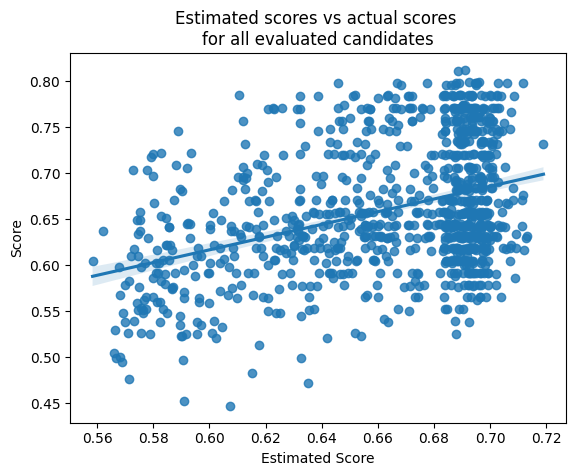

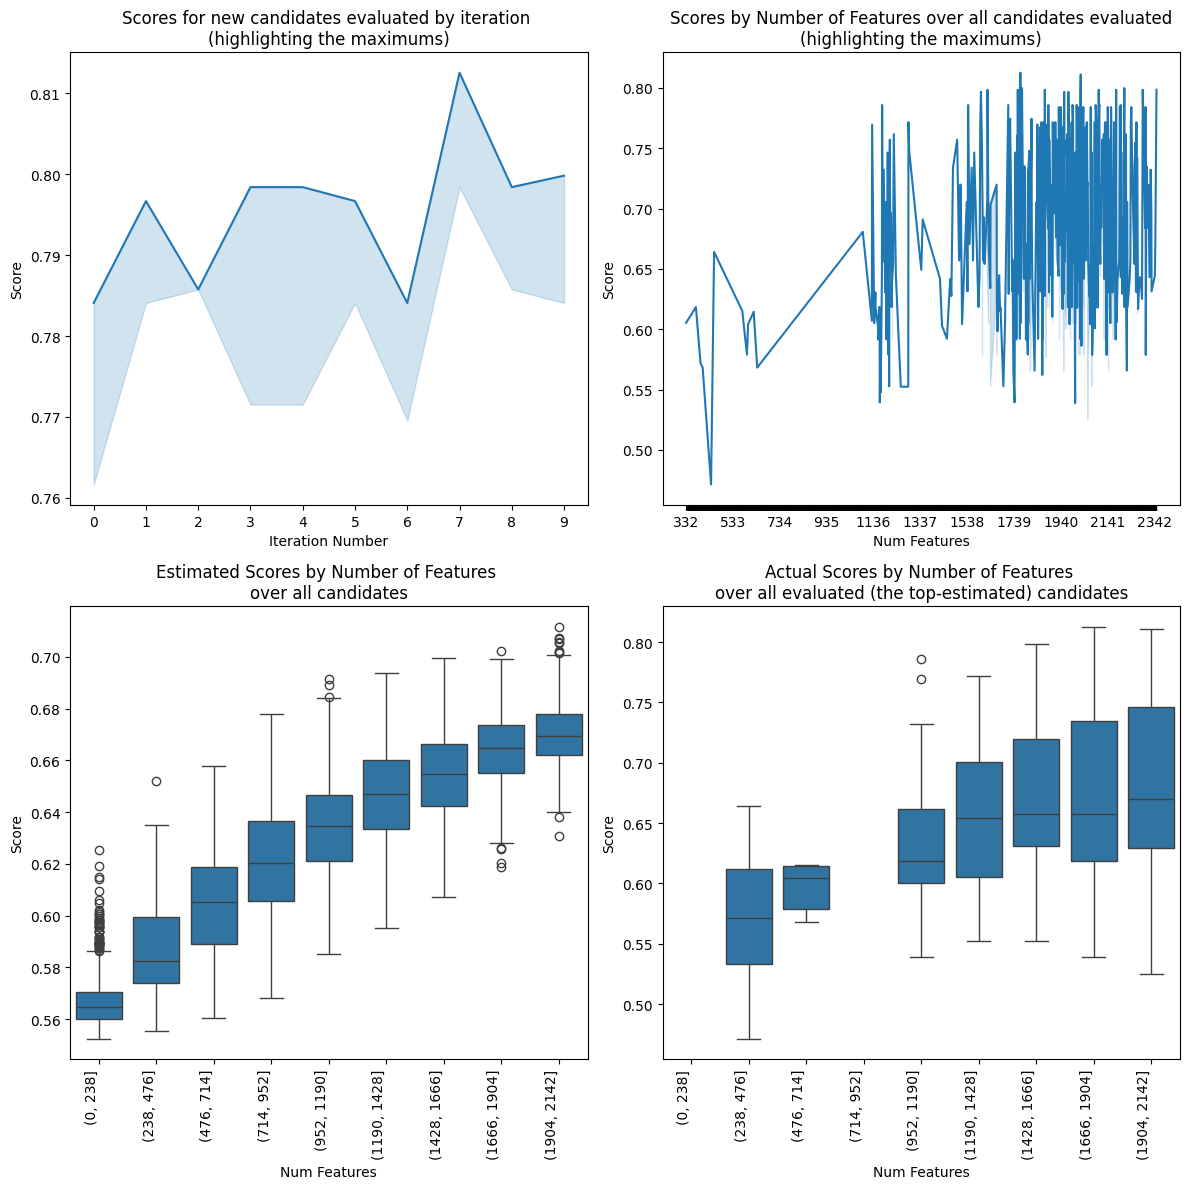

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score

import sys
sys.path.append('/content/drive/My Drive/pads')
from history_based_feature_selection import test_all_features, feature_selection_history

# Collect the data to be used.
x = df[df['label'] != 2].drop(columns=['label'])
y = df[df['label'] != 2]['label']

# Pre-process the data (skipped here, but inlcuded in the notebook).
# This removes nulls and encodes categorical fields.

model_dt = DecisionTreeClassifier()

# Divide the data into train and validate sets
n_samples = len(x) // 2
x_train = pd.DataFrame(x[:n_samples])
y_train = y[:n_samples]
x_val = pd.DataFrame(x[n_samples:])
y_val = y[n_samples:]

np.random.seed(0)

scores_df = feature_selection_history(
        model_dt, {},
        x_train, y_train, x_val, y_val,
        num_iterations=10, num_estimates_per_iteration=5_000, num_trials_per_iteration=50,
        max_features=None, penalty=None,
        plot_evaluation=True, verbose=True, draw_plots=True,
        metric=f1_score, metric_args={'average':'macro'})

In [ ]:
series = scores_df.iloc[0]
series[5:]

,430
5,-
6,Y
7,Y
8,-
9,Y
...,...
2373,-
2374,Y
2375,-
Num Features,1766


In [ ]:
scores_df.to_csv("scores.csv")

In [ ]:
def HBFS_filtered_df(original_df, features_series):

    # Remove non-feature rows from the Series
    features_series_cleaned = features_series[~features_series.index.isin(['Num Features', 'Score'])]

    # Ensure indices are integers and filter for 'Y'
    included_indices = features_series_cleaned[features_series_cleaned == 'Y'].index
    included_indices = included_indices[included_indices.map(str).str.isdigit()]  # Keep only numeric indices
    included_indices = included_indices.astype(int)  # Convert to integers

    # Map indices to column names
    if max(included_indices) > len(original_df.columns):
        raise ValueError("Index in features_series exceeds the number of columns in original_df.")

    included_features = original_df.columns[included_indices]  # Map indices to column names

    # Filter the original DataFrame
    filtered_df = original_df.loc[:, included_features]

    return filtered_df

In [ ]:
df

,Relaxed1_Left_Accelerometer_X_abs_energy,Relaxed1_Left_Accelerometer_X_absolute_maximum,Relaxed1_Left_Accelerometer_X_absolute_sum_of_changes,Relaxed1_Left_Accelerometer_X_count_above_mean,Relaxed1_Left_Accelerometer_X_count_below_mean,Relaxed1_Left_Accelerometer_X_kurtosis,Relaxed1_Left_Accelerometer_X_length,Relaxed1_Left_Accelerometer_X_maximum,Relaxed1_Left_Accelerometer_X_mean,Relaxed1_Left_Accelerometer_X_mean_abs_change,...,Entrainment2_Right_Gyroscope_Z_mean_abs_change,Entrainment2_Right_Gyroscope_Z_mean_change,Entrainment2_Right_Gyroscope_Z_median,Entrainment2_Right_Gyroscope_Z_minimum,Entrainment2_Right_Gyroscope_Z_root_mean_square,Entrainment2_Right_Gyroscope_Z_skewness,Entrainment2_Right_Gyroscope_Z_standard_deviation,Entrainment2_Right_Gyroscope_Z_sum_values,Entrainment2_Right_Gyroscope_Z_variance,label
0,0.005346,0.009385,1.063007,500,476,0.686966,976,0.007030,-0.000233,0.001090,...,0.011756,-0.000054,-0.004338,-0.171969,0.056804,0.030953,0.056509,-5.643614,0.003193,0
1,13.380221,0.556001,28.544725,487,489,3.655442,976,0.556001,-0.000005,0.029277,...,0.012463,-0.000020,-0.014459,-0.397742,0.112564,0.010076,0.112119,-9.756145,0.012571,2
2,0.003560,0.008610,1.135437,531,445,0.573104,976,0.004668,-0.000100,0.001165,...,0.017372,-0.000042,0.003519,-0.277881,0.085805,-0.043397,0.085727,3.557633,0.007349,0
3,0.005594,0.008917,1.366292,490,486,0.843515,976,0.008917,-0.000217,0.001401,...,0.010305,-0.000164,0.001337,-0.127640,0.051773,0.026157,0.051762,1.057014,0.002679,0
4,0.019405,0.015874,2.542418,472,504,0.321554,976,0.015874,0.000018,0.002608,...,0.009476,-0.000107,0.002329,-0.150653,0.060765,0.042647,0.060694,2.872063,0.003684,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.013193,0.012904,1.575305,481,495,0.131550,976,0.011063,0.000090,0.001616,...,0.080380,-0.000780,-0.009489,-1.123851,0.426334,0.257998,0.426311,-4.365879,0.181741,1
230,0.029831,0.020558,2.028810,490,486,-0.115299,976,0.020558,0.000038,0.002081,...,0.031484,-0.000022,-0.004945,-0.352693,0.112591,-0.168042,0.111965,-11.572714,0.012536,2
231,0.013714,0.019414,1.206776,478,498,2.624293,976,0.019414,0.000154,0.001238,...,0.048100,0.000511,-0.014655,-0.731003,0.314677,0.217025,0.314488,-10.658627,0.098902,2
232,0.013222,0.015302,1.624582,509,467,1.505466,976,0.015302,-0.000036,0.001666,...,0.013198,0.000031,-0.014160,-0.212136,0.101939,0.800520,0.101938,-0.405702,0.010391,0


In [ ]:
hbfs_featureset = HBFS_filtered_df(df, series)
hbfs_featureset["label"] = strat['label'].tolist()

In [ ]:
hbfs_featureset

,Relaxed1_Left_Accelerometer_X_absolute_maximum,Relaxed1_Left_Accelerometer_X_absolute_sum_of_changes,Relaxed1_Left_Accelerometer_X_count_above_mean,Relaxed1_Left_Accelerometer_X_count_below_mean,Relaxed1_Left_Accelerometer_X_length,Relaxed1_Left_Accelerometer_X_maximum,Relaxed1_Left_Accelerometer_X_mean_abs_change,Relaxed1_Left_Accelerometer_X_mean_change,Relaxed1_Left_Accelerometer_X_median,Relaxed1_Left_Accelerometer_X_root_mean_square,...,Entrainment2_Right_Gyroscope_Z_kurtosis,Entrainment2_Right_Gyroscope_Z_length,Entrainment2_Right_Gyroscope_Z_mean,Entrainment2_Right_Gyroscope_Z_mean_abs_change,Entrainment2_Right_Gyroscope_Z_mean_change,Entrainment2_Right_Gyroscope_Z_median,Entrainment2_Right_Gyroscope_Z_minimum,Entrainment2_Right_Gyroscope_Z_root_mean_square,Entrainment2_Right_Gyroscope_Z_sum_values,label
0,0.009385,1.063007,500,476,976,0.007030,0.001090,8.594932e-06,-0.000123,0.002340,...,-0.358709,976,-0.005782,0.011756,-0.000054,-0.004338,-0.171969,0.056804,-5.643614,0
1,0.556001,28.544725,487,489,976,0.556001,0.029277,-3.265609e-05,-0.000732,0.117086,...,0.531585,976,-0.009996,0.012463,-0.000020,-0.014459,-0.397742,0.112564,-9.756145,2
2,0.008610,1.135437,531,445,976,0.004668,0.001165,3.733244e-06,0.000153,0.001910,...,0.290071,976,0.003645,0.017372,-0.000042,0.003519,-0.277881,0.085805,3.557633,0
3,0.008917,1.366292,490,486,976,0.008917,0.001401,5.557197e-06,-0.000202,0.002394,...,-0.505359,976,0.001083,0.010305,-0.000164,0.001337,-0.127640,0.051773,1.057014,0
4,0.015874,2.542418,472,504,976,0.015874,0.002608,-3.661125e-06,-0.000152,0.004459,...,-0.489067,976,0.002943,0.009476,-0.000107,0.002329,-0.150653,0.060765,2.872063,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.012904,1.575305,481,495,976,0.011063,0.001616,-5.457300e-07,0.000041,0.003677,...,1.035932,976,-0.004473,0.080380,-0.000780,-0.009489,-1.123851,0.426334,-4.365879,1
230,0.020558,2.028810,490,486,976,0.020558,0.002081,-1.510854e-06,0.000065,0.005528,...,-0.229536,976,-0.011857,0.031484,-0.000022,-0.004945,-0.352693,0.112591,-11.572714,2
231,0.019414,1.206776,478,498,976,0.019414,0.001238,-2.231867e-06,0.000087,0.003749,...,-0.336487,976,-0.010921,0.048100,0.000511,-0.014655,-0.731003,0.314677,-10.658627,2
232,0.015302,1.624582,509,467,976,0.015302,0.001666,5.673708e-06,0.000149,0.003681,...,0.778473,976,-0.000416,0.013198,0.000031,-0.014160,-0.212136,0.101939,-0.405702,0


# Experimentos com HBFS

## Definição

In [ ]:
def evaluate_classifiers(X, y, classifiers, kf):
    results = {}
    selected_features_per_fold = []

    for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(f"\n--- Fold {fold + 1} ---")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for name, clf in classifiers.items():
            if name not in results:
                results[name] = {
                    "acc_list": [],
                    "bal_acc_list": [],
                    "f1_list": [],
                    "confusion_matrices": []
                }

            clf.fit(X_train_scaled, y_train)
            y_pred = clf.predict(X_test_scaled)

            acc = accuracy_score(y_test, y_pred)
            bal_acc = balanced_accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

            results[name]["acc_list"].append(acc)
            results[name]["bal_acc_list"].append(bal_acc)
            results[name]["f1_list"].append(f1)
            results[name]["confusion_matrices"].append(cm)

    for name in results:
        acc_list = results[name]["acc_list"]
        bal_acc_list = results[name]["bal_acc_list"]
        f1_list = results[name]["f1_list"]
        confusion_matrices = results[name]["confusion_matrices"]

        mean_acc = np.mean(acc_list)
        std_acc = np.std(acc_list)
        mean_bal_acc = np.mean(bal_acc_list)
        std_bal_acc = np.std(bal_acc_list)
        mean_f1 = np.mean(f1_list)
        std_f1 = np.std(f1_list)
        confusion_matrix_all = np.sum(confusion_matrices, axis=0)

        results[name]["metrics"] = (mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1)
        results[name]["confusion_matrix"] = confusion_matrix_all

    return results, selected_features_per_fold

In [ ]:
HC_PD = hbfs_featureset[hbfs_featureset['label'] != 2]

exp_wrists = ["Left", "Right"]
exp_tasks = ["Relaxed1", "Relaxed2", "RelaxedTask1", "RelaxedTask2", "StretchHold", "HoldWeight",
         "DrinkGlas", "CrossArms", "TouchNose", "Entrainment1", "Entrainment2"]
exp_sensors = ["Accelerometer", "Gyroscope"]
exp_axes = ['Y', 'Z']
exp_features = ["abs_energy", "absolute_maximum", "absolute_sum_of_changes", "count_above_mean",
                "count_below_mean", "kurtosis", "length", "maximum", "mean",
                "mean_abs_change", "mean_change", "median", "minimum", "root_mean_square",
                "skewness", "standard_deviation", "sum_values", "variance"]

exp_models = {
    'SVM rbf': SVC(),
    'SVM linear': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(verbose=-1)
}

exp_df = filter_dataframe(HC_PD, exp_wrists, exp_tasks, exp_sensors, exp_axes, exp_features)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Treinamento

In [ ]:
results, selected_features_per_fold = evaluate_classifiers_with_rfecv_PCA(X, y, exp_models, kf)

for name, result in results.items():
    mean_acc, std_acc, mean_bal_acc, std_bal_acc, mean_f1, std_f1 = result["metrics"]
    confusion_matrix_all = result["confusion_matrix"]

    print(f"{name}:\n")
    print(f"Acurácia média: {mean_acc:.2%}, Desvio padrão: {std_acc:.2%}")
    print(f"Acurácia balanceada média: {mean_bal_acc:.2%}, Desvio padrão: {std_bal_acc:.2%}")
    print(f"F-score médio: {mean_f1:.2%}, Desvio padrão: {std_f1:.2%}\n")
    print(f"Matriz de Confusão:\n{confusion_matrix_all}\n")


--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 4 ---


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Fold 5 ---
SVM rbf:

Acurácia média: 74.30%, Desvio padrão: 4.07%
Acurácia balanceada média: 73.47%, Desvio padrão: 3.74%
F-score médio: 73.73%, Desvio padrão: 4.05%

Matriz de Confusão:
[[45 25]
 [14 68]]

SVM linear:

Acurácia média: 77.59%, Desvio padrão: 5.77%
Acurácia balanceada média: 77.02%, Desvio padrão: 5.96%
F-score médio: 77.27%, Desvio padrão: 6.09%

Matriz de Confusão:
[[49 21]
 [13 69]]

KNN:

Acurácia média: 68.37%, Desvio padrão: 6.41%
Acurácia balanceada média: 66.50%, Desvio padrão: 6.82%
F-score médio: 64.85%, Desvio padrão: 10.57%

Matriz de Confusão:
[[30 40]
 [ 8 74]]

LDA:

Acurácia média: 78.24%, Desvio padrão: 6.87%
Acurácia balanceada média: 77.83%, Desvio padrão: 6.99%
F-score médio: 78.02%, Desvio padrão: 7.00%

Matriz de Confusão:
[[51 19]
 [14 68]]

Decision Tree:

Acurácia média: 64.99%, Desvio padrão: 12.06%
Acurácia balanceada média: 65.31%, Desvio padrão: 11.62%
F-score médio: 64.34%, Desvio padrão: 12.02%

Matriz de Confusão:
[[50 20]
 [33 49]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
